In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

par = model.par
ss = model.ss
paramesol = model.sol

In [3]:
parameter = 'sigma_Y'
parvalues = [1.01,1.1,1.15]
ModelList = model.multi_model(parameter,parvalues)

Jacobian calculated in 1.0 mins 3 secs
Jacobian calculated in 29.5 secs
Jacobian calculated in 31.2 secs


# Find IRF

In [4]:
Tshock = 50
persistence = 0.80**np.arange(Tshock)
for i in range(len(ModelList)):
    ModelList[i].set_exo_ss()
    ModelList[i].set_unknowns_ss()

    shock = 0.01*ModelList[i].ss.G
    ModelList[i].sol.G[:Tshock] = ModelList[i].ss.G + shock*persistence

    ModelList[i].find_IRF()


initial:
   max. abs. error = 2.22e-01
    2.55e-02 in A_R_ini_error
    3.72e-03 in Aq_diff
    0.00e+00 in bargaining_cond
    4.44e-16 in FOC_capital_agency
    1.15e-14 in FOC_K_ell
    2.22e-01 in mkt_clearing
    0.00e+00 in PC

it = 0
 solve: t1-t0 = 0.8 secs
   max. abs. error = 2.22e-01
    2.47e-05 in A_R_ini_error
    4.98e-06 in Aq_diff
    1.03e-06 in bargaining_cond
    7.62e-07 in FOC_capital_agency
    3.40e-04 in FOC_K_ell
    1.47e-03 in mkt_clearing
    7.64e-05 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.4 secs
   max. abs. error = 1.47e-03
    3.16e-07 in A_R_ini_error
    3.33e-09 in Aq_diff
    7.35e-08 in bargaining_cond
    3.86e-08 in FOC_capital_agency
    2.26e-05 in FOC_K_ell
    7.41e-05 in mkt_clearing
    5.22e-06 in PC
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 2
 solve: t1-t0 = 0.6 secs
   max. abs. error = 7.41e-05
    9.49e-09 in A_R_ini_error
    2.12e-09 in Aq_diff
    1.59e-09 in b

## Figures

### Long view

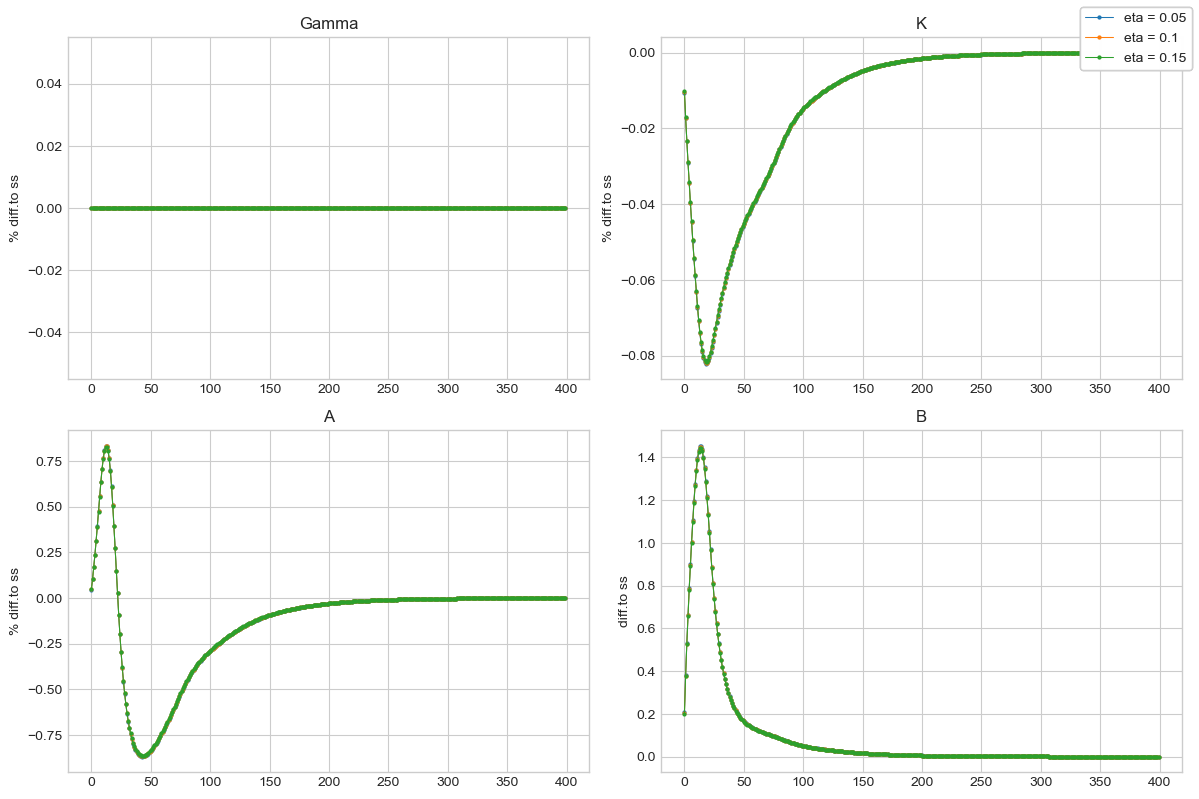

In [5]:
model.plot_IRF_models(ModelList,varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2,parameter=parameter,parvalues=parvalues)

### National accouting - quantities

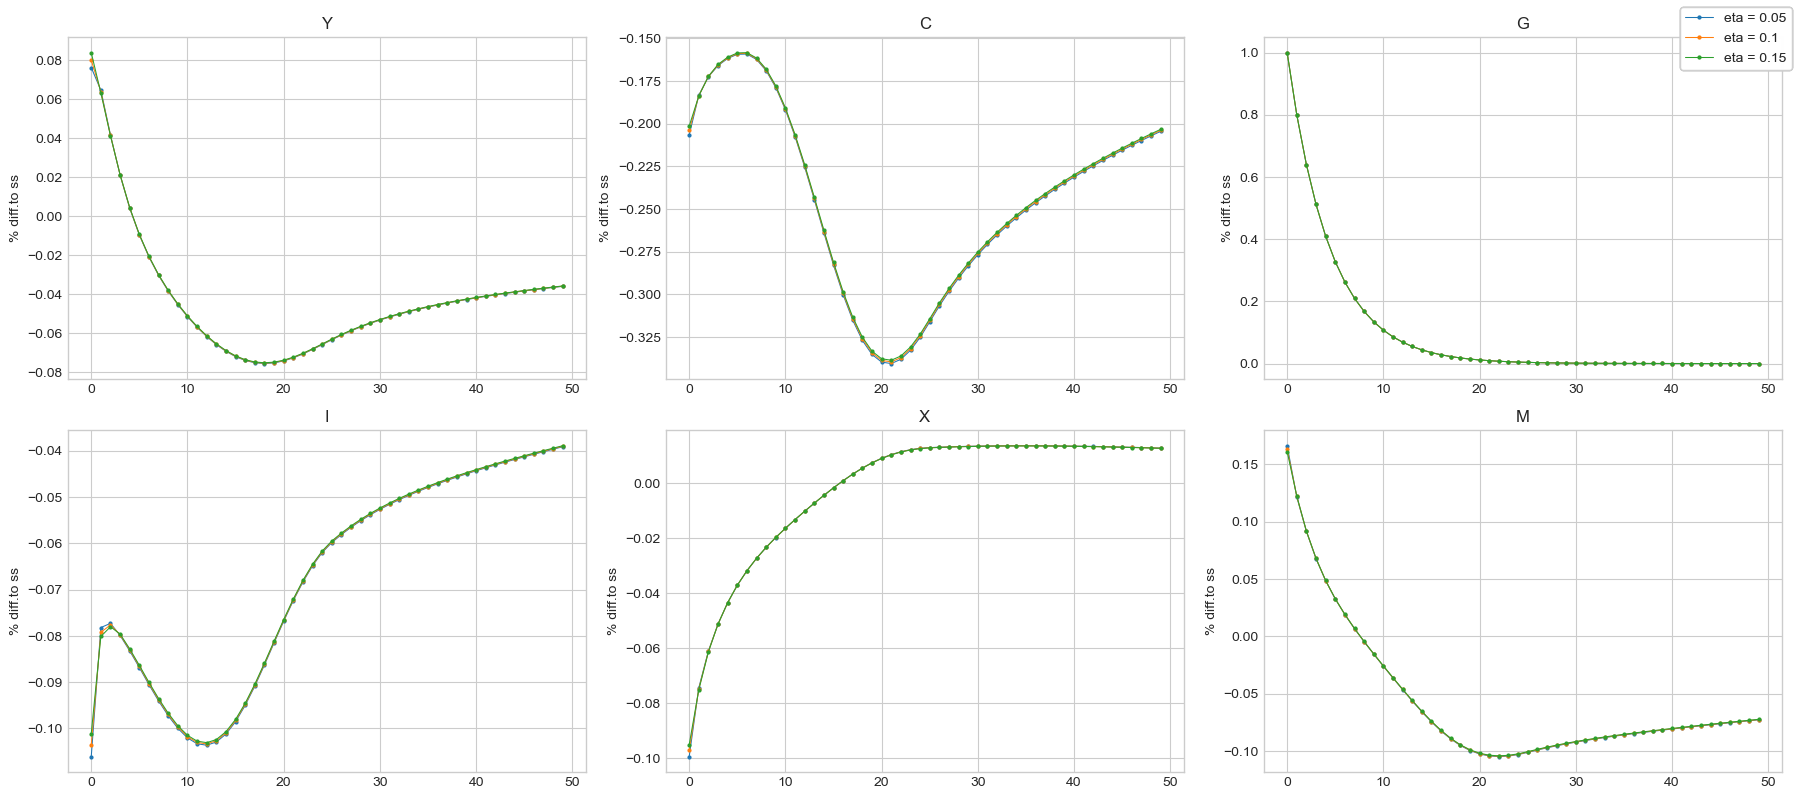

In [6]:
model.plot_IRF_models(ModelList,varlist=['Y','C','G','I','X','M'],parameter=parameter,parvalues=parvalues)

### National accouting - prices

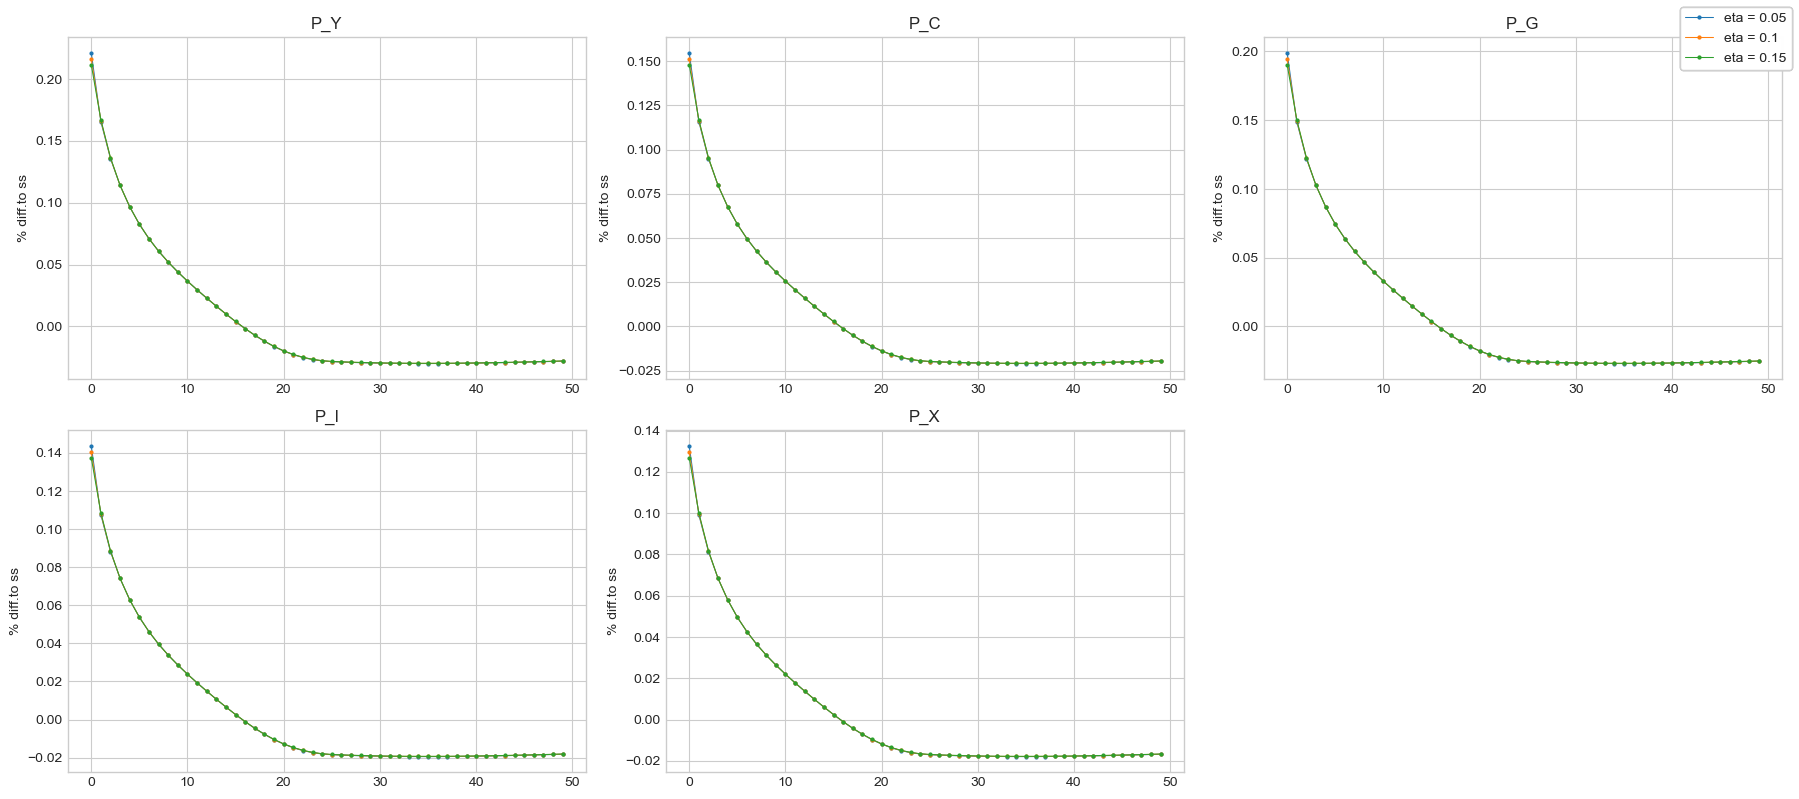

In [7]:
model.plot_IRF_models(ModelList,varlist=['P_Y','P_C','P_G','P_I','P_X'],parameter=parameter,parvalues=parvalues)

### Labor market

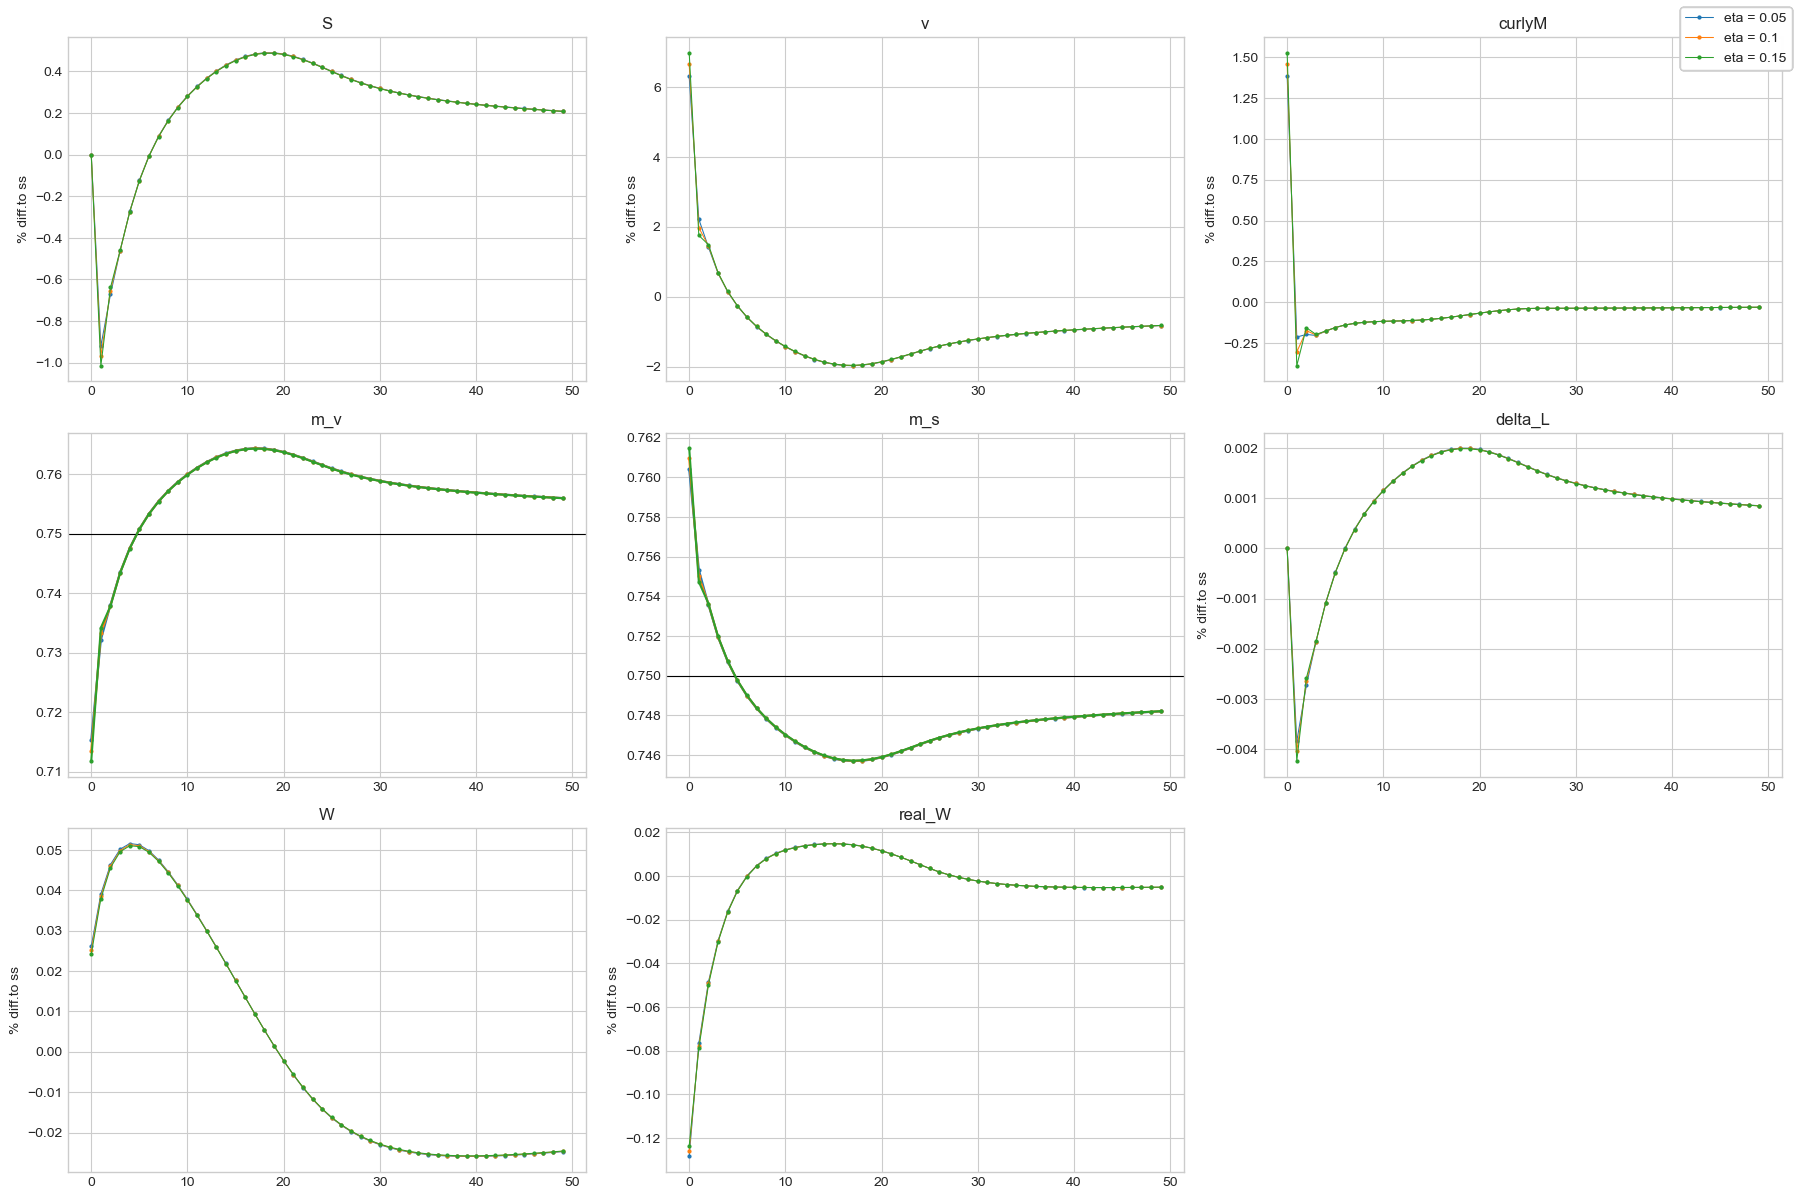

In [8]:
model.plot_IRF_models(ModelList,varlist=['S','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'],parameter=parameter,parvalues=parvalues)

### Capital accumulation

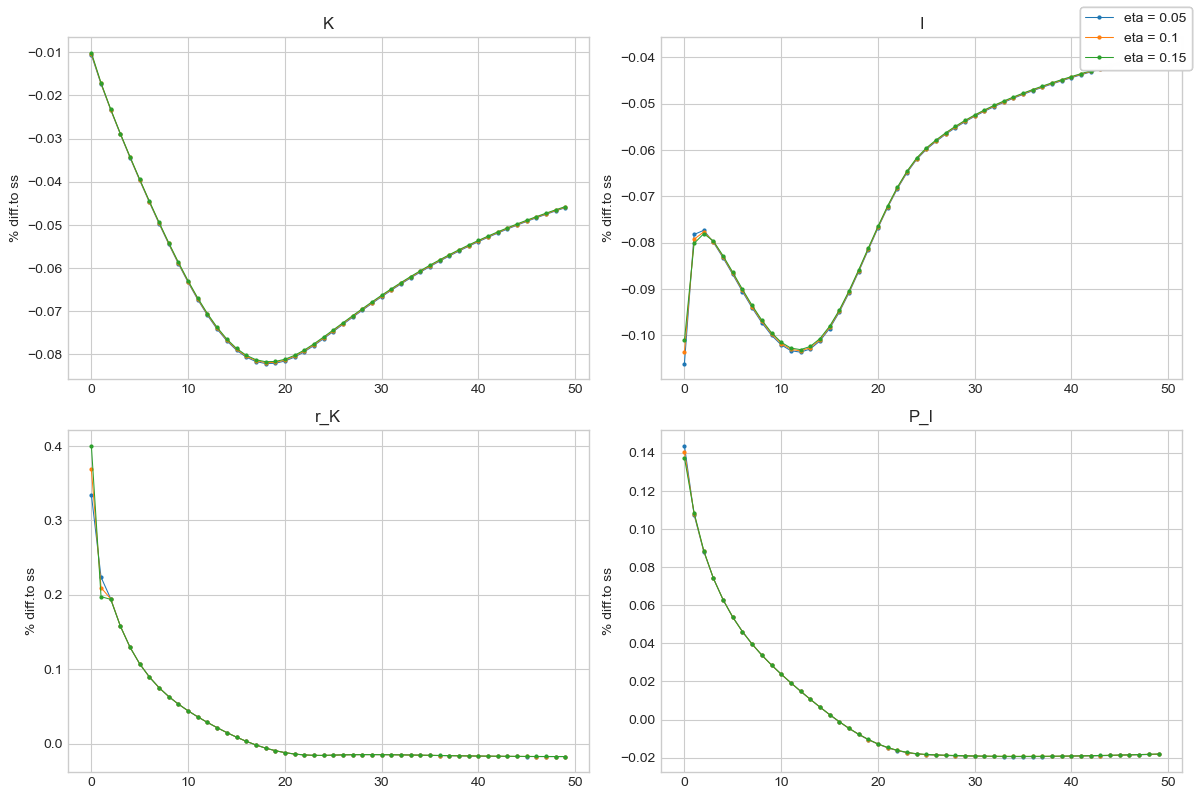

In [9]:
model.plot_IRF_models(ModelList,varlist=['K','I','r_K','P_I'],ncol=2,parameter=parameter,parvalues=parvalues)

### Production firms

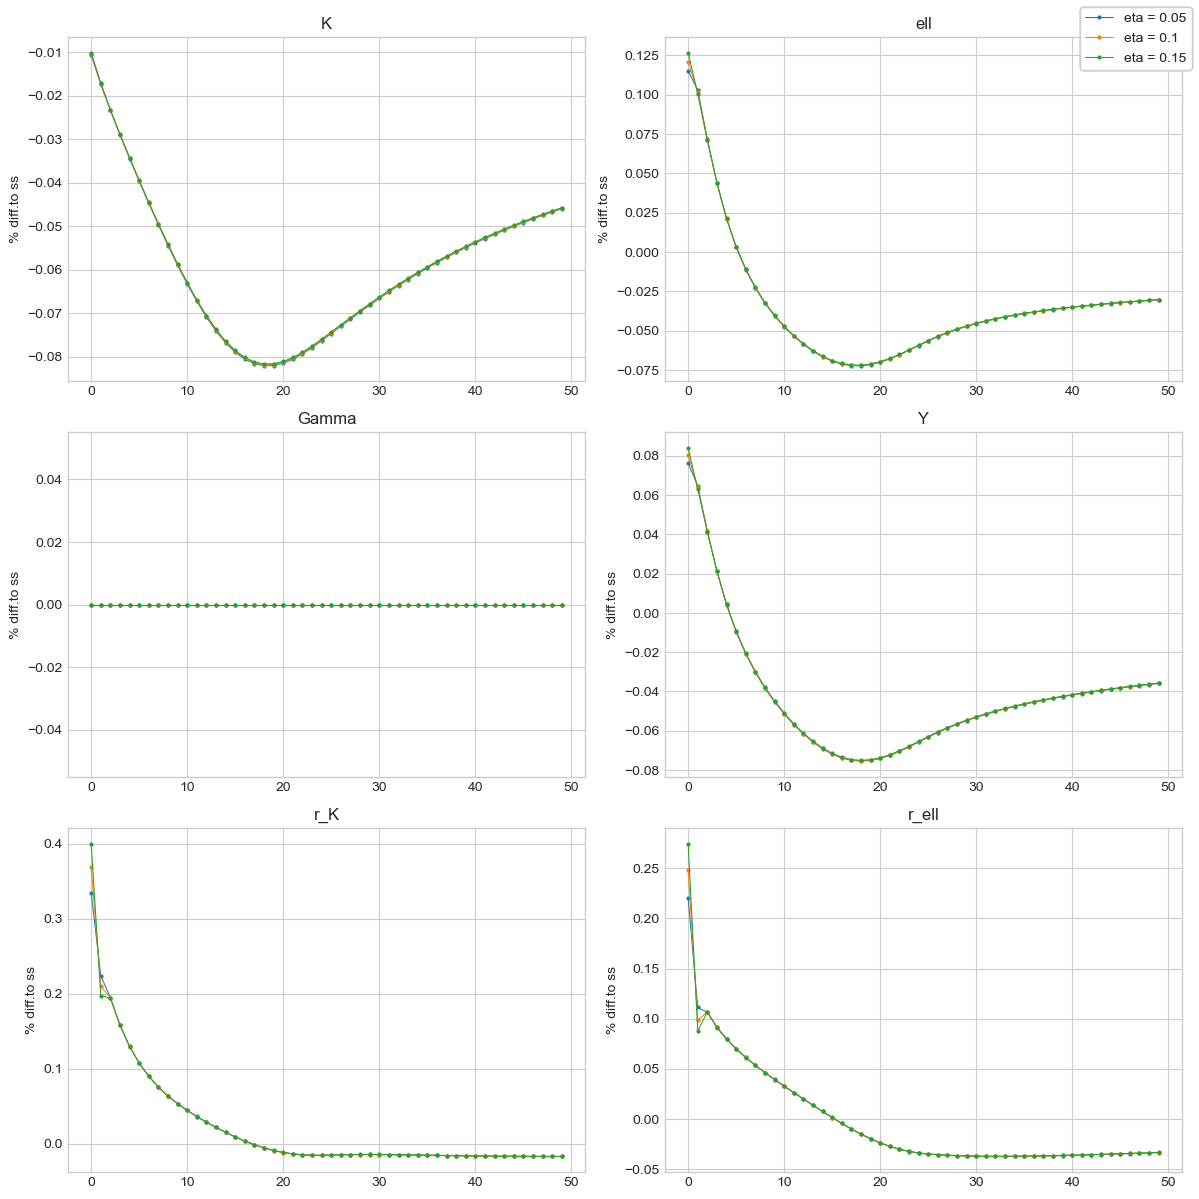

In [10]:
model.plot_IRF_models(ModelList,varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2,parameter=parameter,parvalues=parvalues)

### Phillips curve

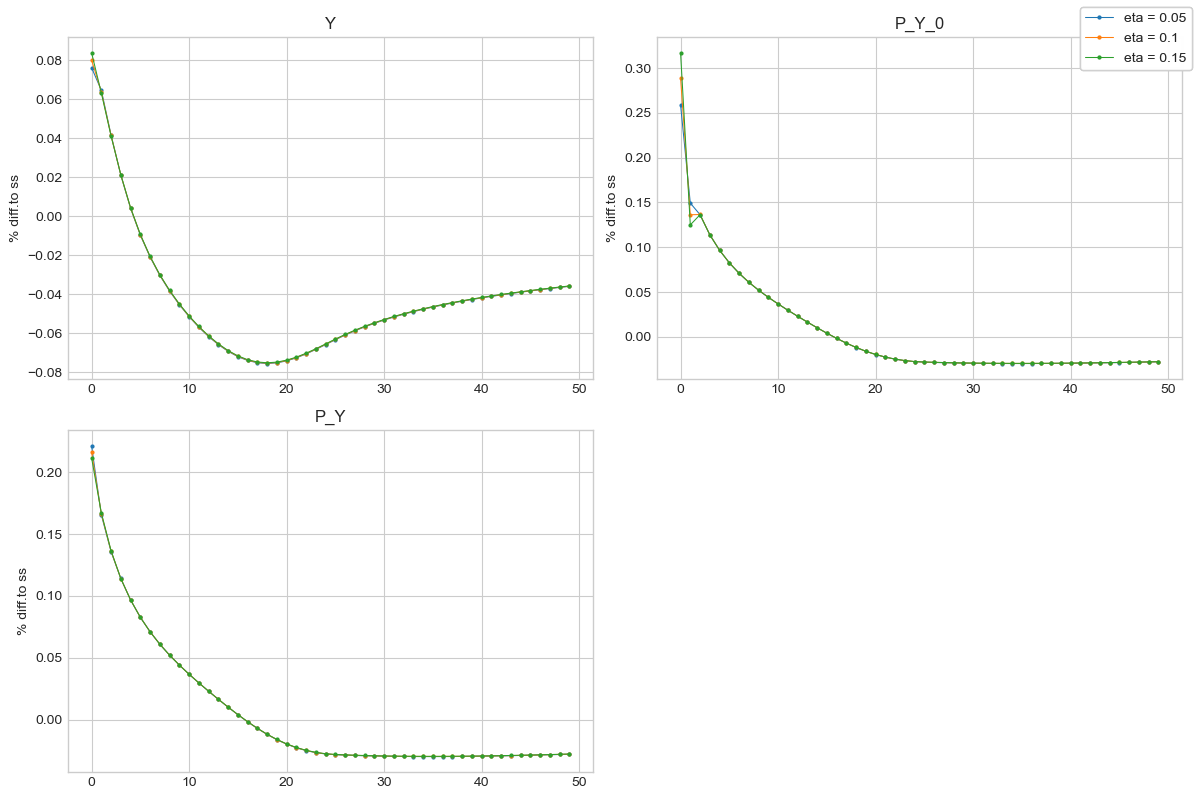

In [11]:
model.plot_IRF_models(ModelList,varlist=['Y','P_Y_0','P_Y'],ncol=2,parameter=parameter,parvalues=parvalues)

### Government

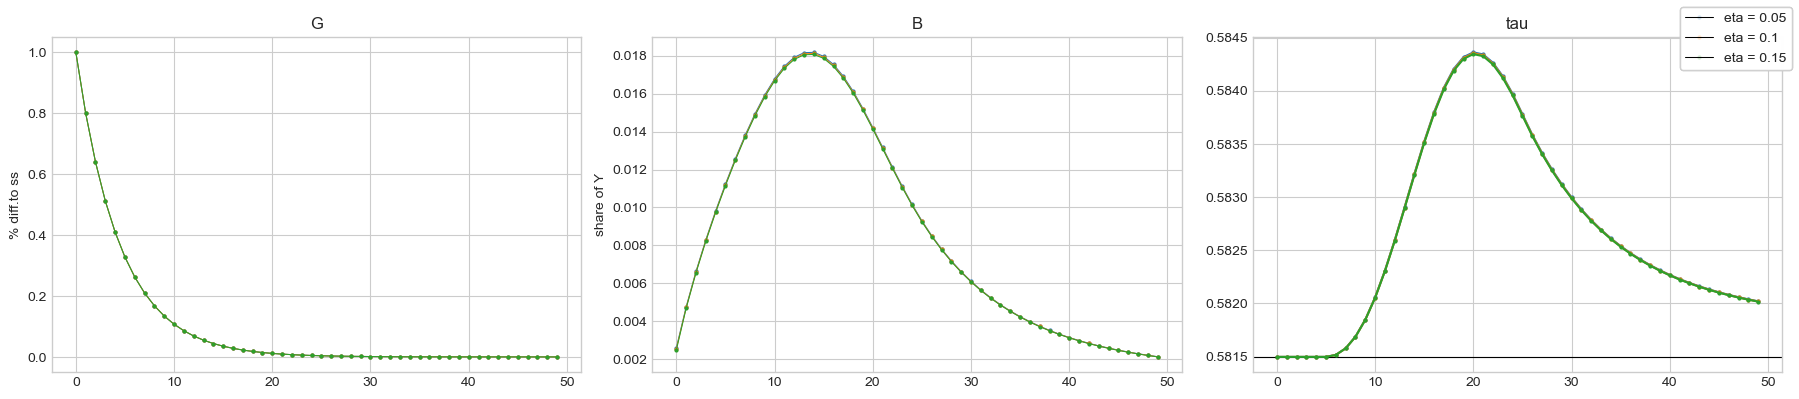

In [12]:
model.plot_IRF_models(ModelList,varlist=['G','B','tau'],abs=['tau'],Y_share=['B'],parameter=parameter,parvalues=parvalues)

### Households - aggregate

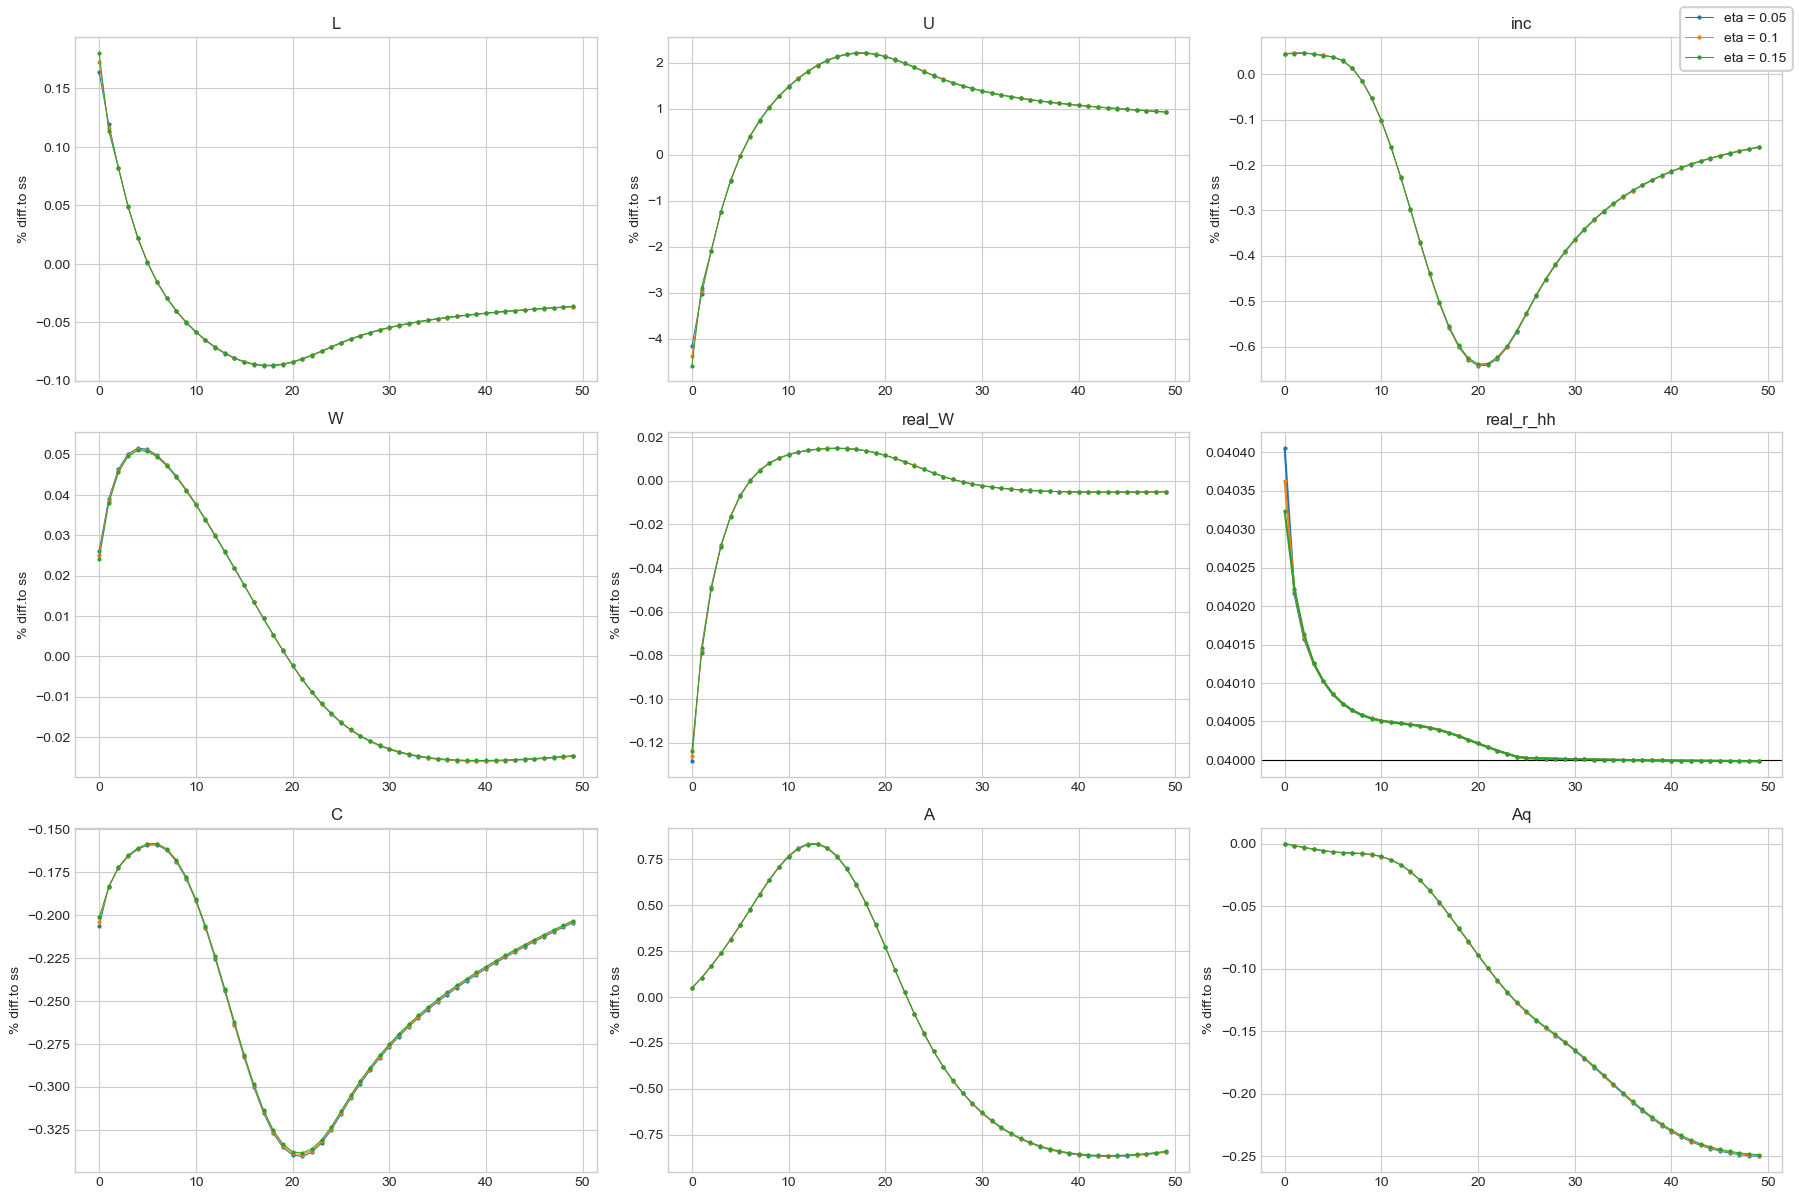

In [13]:
model.plot_IRF_models(ModelList,varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],abs=['real_r_hh'],parameter=parameter,parvalues=parvalues)

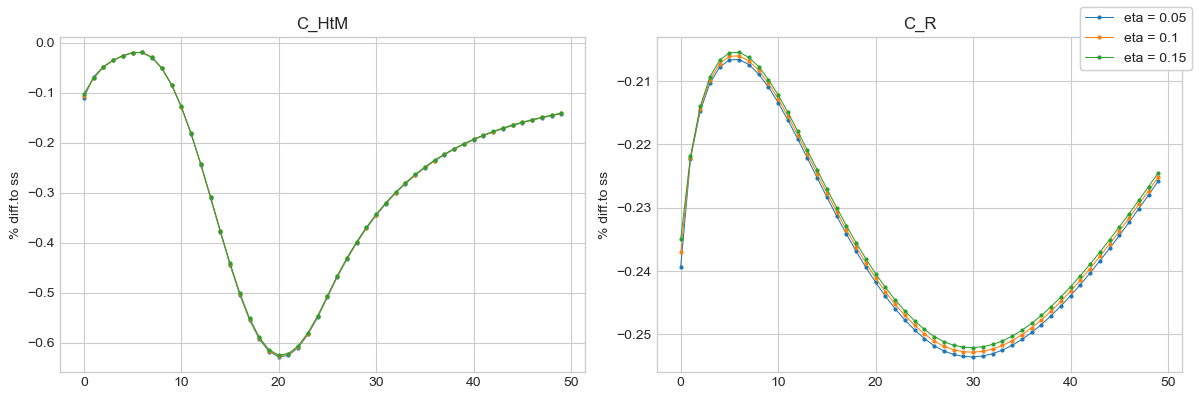

In [14]:
model.plot_IRF_models(ModelList,varlist=['C_HtM','C_R'],ncol=2,parameter=parameter,parvalues=parvalues)